# Simulating Games

## Code

In [1]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

import old_CL_package as cl

In [2]:
def select_attacker (team):
    # this is selecting the first character in the team
    team[0][4] = 1 # tap the attacker
    return team[0]

def select_defender (team):
    # this is selecting the last character in the team
    return team[-1]


def calcualate_damage( att_team , att_deck ,bold, dfs_team,dfs_deck , tough):

    attacker = select_attacker (att_team)
    base_att = attacker[0]

    defender = select_defender (dfs_team)
    base_dfs = defender[1]
    
    np.random.shuffle(att_deck)
    att_bonus = cl.generate_flipped_icons(att_deck,bold)[0]

    np.random.shuffle(dfs_deck)
    dfs_bonus = cl.generate_flipped_icons(dfs_deck,tough)[1]
    
    att_total = base_att + att_bonus
    dfs_total = base_dfs + dfs_bonus
    
    if att_total > dfs_total :
        damage = att_total - dfs_total
    else:
        damage = 0

    return damage

def deal_damage (team,dmg):
    defender = team[-1]
    defender[3] = defender[3] + dmg # -1 because we are attacking the last character in the list
    if defender[3]>=defender[2]:
        team = np.delete(team, -1, axis=0) # remove KOd character
    return team

def reorder_team(team):
    # push untapped characters up
    team = sorted(team, key=lambda a_entry: a_entry[3])
    # push the most damaged down
    team = sorted(team, key=lambda a_entry: a_entry[4])
    return team

# this untappes all charcters in a team
def untap_all (team):
    for character in team:
        character[4] = 0
    return team

# this checks whether a team is tapped out
def tapped_out_check (team):
    return sum(np.array(team)[:,4]) == len(team)


def attack( att_team , att_deck ,bold, dfs_team,dfs_deck , tough):
    att_team = reorder_team(att_team)
    dfs_team = reorder_team(dfs_team)
    
#    print 'before attack:'
#    print att_team
#    print dfs_team

    dmg = calcualate_damage( att_team , att_deck , bold , dfs_team , dfs_deck , tough)
    dfs_team = deal_damage(dfs_team,dmg)

#    print ''
#    print 'damage:'
#    print dmg

#    print ''
#    print 'after attack:'
#    print att_team
#    print dfs_team
#    print ''
    
    return att_team , dfs_team


# this is the main function so far:
def play_turn ( att_team , att_deck , bold , dfs_team , dfs_deck , tough):
    
    # granted attack
    team1, team2 = attack(att_team , att_deck , bold, dfs_team , dfs_deck , tough)
    
    # additional attacks (if wheel turn)
    while len(team2)>0 and tapped_out_check (team1)==0 and tapped_out_check (team2) == 1:
        team1, team2 = attack( team1 , deck1 , bold , team2 , deck2 , tough )
    
    return team1 , team2



# PLAY GAME :)
# This is the final function

def play_game ( team1 , deck1 , bold1 , tough1 , team2 , deck2 , bold2 , tough2 ):

    Team  = [team1,team2]
    Deck  = [deck1,deck2]
    Bold  = [bold1,bold2]
    Tough = [tough1,tough2]
    
    turn = 0
    
    while len(Team[0]) > 0 and len(Team[1]) > 0 and turn < 50:   
    # (the game is stopped if it doesn't end in 100 turns)
        turn = turn + 1
    
        att_team = Team[(1+turn)%2]
        att_deck = Deck[(1+turn)%2]
        bold = Bold[(1+turn)%2]

        dfs_team = Team[turn%2]
        dfs_deck = Deck[turn%2]
        tough = Tough[turn%2]

        Team[(1+turn)%2] , Team[turn%2] = play_turn ( att_team , att_deck , bold , dfs_team , dfs_deck , tough)
    
    return turn , len(Team[0]) , len(Team[1])


## Teams

In [3]:
def generate_team(size):
    ch = [[6,2,35,0,0],
          [5,2,16,0,0],
          [4,2,12,0,0],
          [3,2,9,0,0],
          [2,2,7,0,0]]
    team = []
    for i in range(size):
        team.append(ch[size-1])
    return team

## Decks

In [4]:
only_orange = cl.generate_deck(OO=6,O=28,W=6)
mostly_orange = cl.generate_deck(OO=3,O=23,OB=3,B=3,W=8)
balanced = cl.generate_deck(OB=6,O=12,B=12,W=10)
mostly_blue = cl.generate_deck(BB=3,B=23,OB=3,O=3,W=8)
only_blue = cl.generate_deck(BB=6,B=28,W=6)

In [5]:
bold_only_orange   = 3
bold_mostly_orange = 2
bold_balanced      = 1
bold_mostly_blue   = 0
bold_only_blue     = 0

In [6]:
tough_only_orange   = 0
tough_mostly_orange = 0
tough_balanced      = 1
tough_mostly_blue   = 2
tough_only_blue     = 3

## Simulations

In [7]:
deck = [ only_blue , mostly_blue , balanced , mostly_orange , only_orange ]
bold = [bold_only_blue,bold_mostly_blue,bold_balanced,bold_mostly_orange,bold_only_orange]
tough = [tough_only_blue,tough_mostly_blue,tough_balanced,tough_mostly_orange,tough_only_orange]

team_name = [ '1-tall' , '2-tall' , '3-wide' , '4-wide' , '5-wide' ]
deck_name = [ 'mono blue' , 'mostly blue' , 'balanced' , 'mostly orange' , 'mono orange' ]

def strategy_name(size,code):
    return team_name[size-1]+', '+deck_name[code-1]

In [8]:
# scan

data = []
#num_games = 10000
num_games = 3

for i1 in range(5):
    for i2 in range(5):
        for j1 in range(5):
            for j2 in range(5):
                results = [] 
                for k in range(num_games):    
                    team1  = generate_team(i1+1)
                    deck1  = deck[i2]
                    bold1  = bold[i2]
                    tough1 = tough[i2]
    
                    team2  = generate_team(j1+1)
                    deck2  = deck[j2]
                    bold2  = bold[j2]
                    tough2 = tough[j2]
                    results.append( play_game ( team1 , deck1 , bold1 , tough1 , team2 , deck2 , bold2 , tough2 ) )
                r = np.array(results)
                turns_mean = np.mean(r[:,0])
                turns_std = np.std(r[:,0])
                win_rate = 100.*len(r[:,1][r[:,1]>0])/num_games
                loss_rate = 100.*len(r[:,2][r[:,2]>0])/num_games
                
                label = team_name[i1]+' '+deck_name[i2]+' (P1) vs. '+ team_name[j1]+' '+deck_name[j2] + ' (P2)'
                match_code = [i1,i2,j1,j2]
                
                print (match_code , [turns_mean , turns_std] , [win_rate , loss_rate] , label )
                data.append([i1+1,i2+1,j1+1,j2+1,turns_mean , turns_std,win_rate , loss_rate,label])

[0, 0, 0, 0] [50.0, 0.0] [100.0, 100.0] 1-tall mono blue (P1) vs. 1-tall mono blue (P2)
[0, 0, 0, 1] [50.0, 0.0] [100.0, 100.0] 1-tall mono blue (P1) vs. 1-tall mostly blue (P2)
[0, 0, 0, 2] [36.333333333333336, 6.79869268479038] [100.0, 0.0] 1-tall mono blue (P1) vs. 1-tall balanced (P2)
[0, 0, 0, 3] [19.666666666666668, 0.9428090415820634] [100.0, 0.0] 1-tall mono blue (P1) vs. 1-tall mostly orange (P2)
[0, 0, 0, 4] [16.666666666666668, 0.4714045207910317] [66.66666666666667, 33.333333333333336] 1-tall mono blue (P1) vs. 1-tall mono orange (P2)
[0, 0, 1, 0] [50.0, 0.0] [100.0, 100.0] 1-tall mono blue (P1) vs. 2-tall mono blue (P2)
[0, 0, 1, 1] [50.0, 0.0] [100.0, 100.0] 1-tall mono blue (P1) vs. 2-tall mostly blue (P2)
[0, 0, 1, 2] [16.333333333333332, 0.9428090415820634] [100.0, 0.0] 1-tall mono blue (P1) vs. 2-tall balanced (P2)
[0, 0, 1, 3] [11.0, 1.632993161855452] [100.0, 0.0] 1-tall mono blue (P1) vs. 2-tall mostly orange (P2)
[0, 0, 1, 4] [9.0, 0.0] [100.0, 0.0] 1-tall mono bl

Sometimes the game doesn't end when
when win_rate + loss_rate > 100

Playing 100 games, and setting the time limit to 100 turn, it takes 6 minutes.

In [9]:
cols = ['team 1 size','deck 1 code', 'team 2 size', 'deck 2 code', 
           '# turns (mean)', '# turns (SD)', 'P1 wins (%)','P2 wins (%)','description']

In [10]:
df = pd.DataFrame(data,columns=cols)
# df.to_csv('/Users/Enrico/Desktop/simulations.csv',index=False)
#df = pd.read_csv('/Users/Enrico/Desktop/simulations.csv')

In [11]:
df

,team 1 size,deck 1 code,team 2 size,deck 2 code,# turns (mean),# turns (SD),P1 wins (%),P2 wins (%),description
0,1,1,1,1,50.000000,0.000000,100.000000,100.000000,1-tall mono blue (P1) vs. 1-tall mono blue (P2)
1,1,1,1,2,50.000000,0.000000,100.000000,100.000000,1-tall mono blue (P1) vs. 1-tall mostly blue (P2)
2,1,1,1,3,36.333333,6.798693,100.000000,0.000000,1-tall mono blue (P1) vs. 1-tall balanced (P2)
3,1,1,1,4,19.666667,0.942809,100.000000,0.000000,1-tall mono blue (P1) vs. 1-tall mostly orange...
4,1,1,1,5,16.666667,0.471405,66.666667,33.333333,1-tall mono blue (P1) vs. 1-tall mono orange (P2)
...,...,...,...,...,...,...,...,...,...
620,5,5,5,1,39.666667,6.599663,100.000000,0.000000,5-wide mono orange (P1) vs. 5-wide mono blue (P2)
621,5,5,5,2,16.333333,3.399346,100.000000,0.000000,5-wide mono orange (P1) vs. 5-wide mostly blue...
622,5,5,5,3,11.666667,0.942809,100.000000,0.000000,5-wide mono orange (P1) vs. 5-wide balanced (P2)
623,5,5,5,4,9.333333,2.357023,66.666667,33.333333,5-wide mono orange (P1) vs. 5-wide mostly oran...


# Analysis & Visualization

In [12]:
def select_team_deck(dataframe,size,code):
    d1 = dataframe[dataframe['team 1 size'] == size]
    d2 = d1[d1['deck 1 code'] == code]
    return d2

In [13]:
#def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
def heatmap(data, row_labels, col_labels, ax=None, **kwargs):
    
    """

    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
#    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
#    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

#    return im, cbar
    return im

In [14]:
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


In [15]:
def make_win_figure(win_matrix):
    fig, ax = plt.subplots()

    #im, cbar = heatmap(win_matrix, team_name, deck_name, ax=ax, cmap=plt.cm.Greys)
    im = heatmap(win_matrix, team_name, deck_name, ax=ax, cmap=plt.cm.Greys)
    texts = annotate_heatmap(im, valfmt="{x:.0f}")

    fig.tight_layout()
    plt.yticks(size=13)
    plt.xticks(size=13)
    plt.title(strategy_name(size,code)+':\nwinning rate (%)',size=12)


    # game doesn't end (red circle)
    for i in range(5):
        for j in range(5):
            if win_matrix[i][j] == 102:
                rect = patches.Rectangle((j-0.5,i-0.5),1,1,linewidth=1,edgecolor='w',facecolor='w')
                ax.add_patch(rect)
                circ = patches.Circle((j,i),.25,linewidth=1,edgecolor='r',facecolor='w')
                ax.add_patch(circ)


    # game might not end (gray circle)
    for i in range(5):
        for j in range(5):
            if win_matrix[i][j] == 101:
                rect = patches.Rectangle((j-0.5,i-0.5),1,1,linewidth=1,edgecolor='w',facecolor='w')
                ax.add_patch(rect)
                circ = patches.Circle((j,i),.25,linewidth=1,edgecolor='gray',facecolor='w')
                ax.add_patch(circ)

    # Border
    ax.axhline(y=-0.5, color='k',linewidth=2);
    ax.axhline(y=4.5, color='k',linewidth=2);
    ax.axvline(x=-0.5, color='k',linewidth=2);
    ax.axvline(x=4.5, color='k',linewidth=2);
            
#    plt.show()
    fig.savefig('/Users/enrico/Desktop/win_'+strategy_name(size,code)+'_.pdf', 
                bbox_inches = 'tight', pad_inches = .1)

In [16]:
def make_turn_figure(turn_matrix):
    fig, ax = plt.subplots()
    im = heatmap(turn_matrix, team_name, deck_name, ax=ax,cmap=plt.cm.Greys)
    texts = annotate_heatmap(im, valfmt="{x:.0f}")

    fig.tight_layout()
    plt.yticks(size=13)
    plt.xticks(size=13)
    plt.title(strategy_name(size,code)+':\naverage number of turns',size=12)


    # game doesn't end (red circle)
    for i in range(5):
        for j in range(5):
            if turn_matrix[i][j] == 52:
                rect = patches.Rectangle((j-0.5,i-0.5),1,1,linewidth=1,edgecolor='w',facecolor='w')
                ax.add_patch(rect)
                circ = patches.Circle((j,i),.25,linewidth=1,edgecolor='r',facecolor='w')
                ax.add_patch(circ)


    # game might not end (gray circle)
    for i in range(5):
        for j in range(5):
            if turn_matrix[i][j] == 51:
                rect = patches.Rectangle((j-0.5,i-0.5),1,1,linewidth=1,edgecolor='w',facecolor='w')
                ax.add_patch(rect)
                circ = patches.Circle((j,i),.25,linewidth=1,edgecolor='gray',facecolor='w')
                ax.add_patch(circ)

    # Border
    ax.axhline(y=-0.5, color='k',linewidth=2);
    ax.axhline(y=4.5, color='k',linewidth=2);
    ax.axvline(x=-0.5, color='k',linewidth=2);
    ax.axvline(x=4.5, color='k',linewidth=2);
            
#    plt.show()
    fig.savefig('/Users/enrico/Desktop/turn_'+strategy_name(size,code)+'_.pdf', 
                bbox_inches = 'tight', pad_inches = .1)

In [17]:
def generate_win_matrix(df,size,code):
    table = []
    s = select_team_deck(df,size,code)
    for i in range(len(s)):
        entry = np.array(s)[i]
        if entry[4] < 50 and entry[6]+entry[7] <= 100:
            table.append([entry[2],entry[3],entry[6]])
        else:
            if entry[4] < 50 and entry[6]+entry[7] > 100:
                table.append([entry[2],entry[3],101])
            else:
                if entry[4] == 50:
                    table.append([entry[2],entry[3],102])
    win_matrix = np.array([[table[i+5*j][2] for i in range(5)] for j in range(5)])
    return win_matrix

In [18]:
def generate_turn_matrix(df,size,code):
    table = []
    s = select_team_deck(df,size,code)
    for i in range(len(s)):
        entry = np.array(s)[i]
        if entry[4] < 50 and entry[6]+entry[7] <= 100:
            table.append([entry[2],entry[3],entry[4]])
        else:
            if entry[4] < 50 and entry[6]+entry[7] > 100:
                table.append([entry[2],entry[3],51])
            else:
                if entry[4] == 50:
                    table.append([entry[2],entry[3],52])
    turn_matrix = np.array([[table[i+5*j][2] for i in range(5)] for j in range(5)])
    return turn_matrix

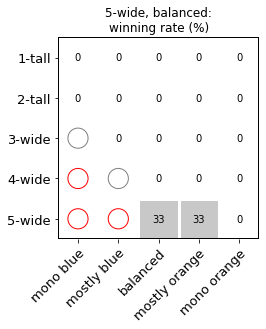

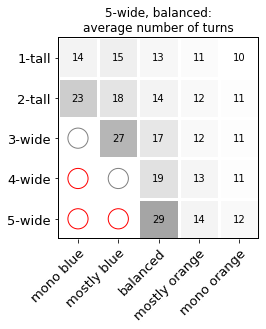

In [19]:
size = 5
code = 3

win_matrix = generate_win_matrix(df,size,code)
turn_matrix = generate_turn_matrix(df,size,code)

make_win_figure(win_matrix)
make_turn_figure(turn_matrix)